In [1]:
from IPython.display import Image, SVG
import matplotlib.pyplot as plt

%matplotlib inline

import numpy as np
import keras
from keras.datasets import cifar10
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, Dropout, Activation

from keras.utils.vis_utils import model_to_dot

Using TensorFlow backend.


In [2]:
batch_size = 32
epochs = 30

In [3]:
# Loads the training and test data sets
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
y_test_confusion_matrix = y_test

In [4]:
first_image = X_train[0, :, :]

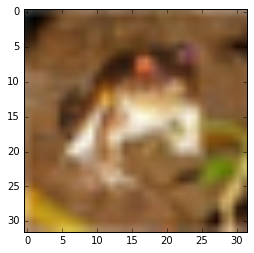

In [5]:
# To interpret the values as a 28x28 image, we need to reshape
# the numpy array, which is one dimensional.
plt.imshow(first_image, cmap=plt.cm.Greys);

In [6]:
num_classes = len(np.unique(y_train))
num_classes

10

In [7]:
# 60K training 28 x 28 (pixel) images
X_train.shape

(50000, 32, 32, 3)

In [8]:
# 10K test 28 x 28 (pixel) images
X_test.shape

(10000, 32, 32, 3)

In [9]:
# The training and test data sets are integers, ranging from 0 to 255.
# We reshape the training and test data sets to be a 4D tensor.
# Dimensions: num_images x 32 x 32 x 3
# The 3 is because we have 3 channel (RGB). If greyscale images, we'd have 1 channels.
X_train = X_train.reshape(50000, 32, 32, 3).astype('float32')
X_test = X_test.reshape(10000, 32, 32, 3).astype('float32')
input_shape = X_train.shape[1:] #(32, 32, 3)

In [10]:
# Scales the training and test data to range between 0 and 1.
max_value = X_train.max()
X_train /= max_value
X_test /= max_value

In [11]:
# The training and test labels are integers from 0 to 9 indicating the class label
(y_train, y_test)

(array([[6],
        [9],
        [9],
        ..., 
        [9],
        [1],
        [1]], dtype=uint8), array([[3],
        [8],
        [8],
        ..., 
        [5],
        [1],
        [7]]))

In [12]:
# We convert the class labels to binary class matrices
y_train = np_utils.to_categorical(y_train, num_classes)
y_test = np_utils.to_categorical(y_test, num_classes)

In [13]:
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=X_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

In [14]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
activation_2 (Activation)    (None, 30, 30, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 64)        18496     
__________

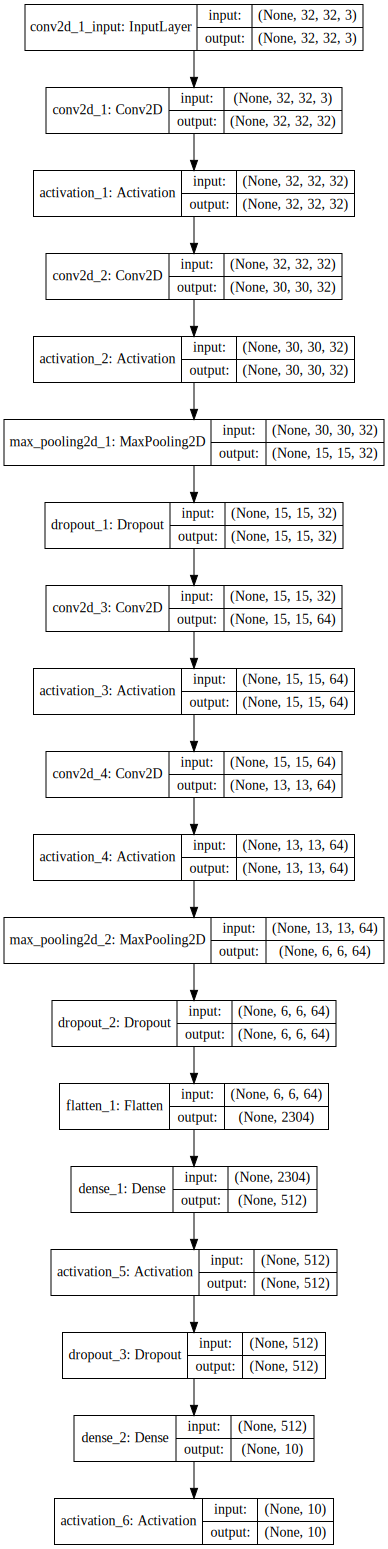

In [15]:
SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))


In [16]:
import json
json.loads(model.to_json())

{u'backend': u'tensorflow',
 u'class_name': u'Sequential',
 u'config': [{u'class_name': u'Conv2D',
   u'config': {u'activation': u'linear',
    u'activity_regularizer': None,
    u'batch_input_shape': [None, 32, 32, 3],
    u'bias_constraint': None,
    u'bias_initializer': {u'class_name': u'Zeros', u'config': {}},
    u'bias_regularizer': None,
    u'data_format': u'channels_last',
    u'dilation_rate': [1, 1],
    u'dtype': u'float32',
    u'filters': 32,
    u'kernel_constraint': None,
    u'kernel_initializer': {u'class_name': u'VarianceScaling',
     u'config': {u'distribution': u'uniform',
      u'mode': u'fan_avg',
      u'scale': 1.0,
      u'seed': None}},
    u'kernel_regularizer': None,
    u'kernel_size': [3, 3],
    u'name': u'conv2d_1',
    u'padding': u'same',
    u'strides': [1, 1],
    u'trainable': True,
    u'use_bias': True}},
  {u'class_name': u'Activation',
   u'config': {u'activation': u'relu',
    u'name': u'activation_1',
    u'trainable': True}},
  {u'class_na

Train on 50000 samples, validate on 10000 samples
Epoch 1/30
50000/50000 [==============================] - 12s 233us/step - loss: 0.2294 - acc: 0.9132 - val_loss: 0.1825 - val_acc: 0.9291
Epoch 2/30
50000/50000 [==============================] - 11s 217us/step - loss: 0.1752 - acc: 0.9317 - val_loss: 0.1531 - val_acc: 0.9391
Epoch 3/30
50000/50000 [==============================] - 11s 218us/step - loss: 0.1547 - acc: 0.9393 - val_loss: 0.1359 - val_acc: 0.9467
Epoch 4/30
50000/50000 [==============================] - 11s 217us/step - loss: 0.1412 - acc: 0.9451 - val_loss: 0.1377 - val_acc: 0.9469
Epoch 5/30
50000/50000 [==============================] - 11s 221us/step - loss: 0.1327 - acc: 0.9484 - val_loss: 0.1249 - val_acc: 0.9514
Epoch 6/30
50000/50000 [==============================] - 11s 224us/step - loss: 0.1256 - acc: 0.9510 - val_loss: 0.1205 - val_acc: 0.9529
Epoch 7/30
50000/50000 [==============================] - 11s 225us/step - loss: 0.1200 - acc: 0.9532 - val_loss: 0.

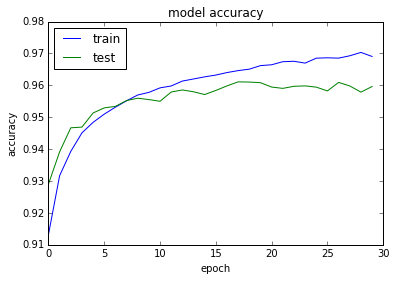

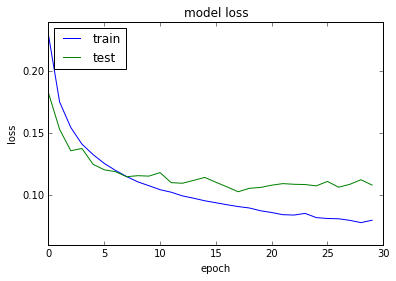

In [17]:
# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# Fit the model

history = model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(X_test, y_test), shuffle=True, verbose=1)
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [19]:
# Evaluation on test data
#model.evaluate(X_test, y_test)
evaluation = model.evaluate(X_test, y_test, batch_size=256, verbose=1)
print('Summary: Loss over the test dataset: %.4f, Accuracy: %.4f' % (evaluation[0], evaluation[1]))

10000/10000 [==============================] - 0s 46us/step
Summary: Loss over the test dataset: 0.1082, Accuracy: 0.9596


In [20]:
from sklearn.metrics import classification_report
import numpy as np

Y_test = np.argmax(y_test, axis=1) # Convert one-hot to index
y_pred = model.predict_classes(X_test)
print(classification_report(Y_test, y_pred))

             precision    recall  f1-score   support

          0       0.77      0.85      0.81      1000
          1       0.90      0.89      0.90      1000
          2       0.81      0.61      0.70      1000
          3       0.59      0.64      0.61      1000
          4       0.78      0.71      0.74      1000
          5       0.70      0.72      0.71      1000
          6       0.78      0.87      0.82      1000
          7       0.84      0.83      0.84      1000
          8       0.86      0.88      0.87      1000
          9       0.86      0.87      0.87      1000

avg / total       0.79      0.79      0.79     10000



In [21]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [22]:
from sklearn.metrics import confusion_matrix
import itertools

cm = confusion_matrix(y_test_confusion_matrix , y_pred)


Confusion matrix, without normalization
[[852  10  18  18  10   3  11   4  44  30]
 [ 12 894   2   3   3   6   8   2  16  54]
 [ 83   4 612  49  61  71  72  26  14   8]
 [ 27   4  27 635  40 157  60  25  15  10]
 [ 18   2  41  87 709  23  56  46  11   7]
 [ 14   0  17 159  26 718  17  37   6   6]
 [  4   0  24  56  12  19 869   4  11   1]
 [ 12   4  14  42  46  24   9 835   5   9]
 [ 68  17   2  12   2   2   2   5 875  15]
 [ 21  58   1   9   0   2   8   5  23 873]]


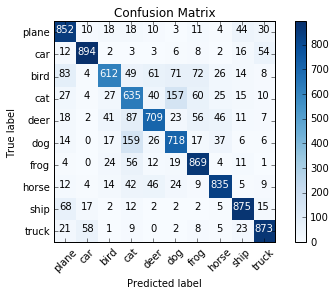

In [23]:

cm_plot_labels = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
plot_confusion_matrix(cm, cm_plot_labels, title='Confusion Matrix')